# Разработка моделей машинного обучения, позволяющие HR-аналитикам компании «Работа с заботой» избежать финансовых потерь и оттока сотрудников

HR-аналитики компании «Работа с заботой» помогают бизнесу оптимизировать управление персоналом: бизнес предоставляет данные, а аналитики предлагают, как избежать финансовых потерь и оттока сотрудников. Чтобы быстрее и точнее отвечать на вопросы бизнеса необходимо машинное обучение.\
Компания предоставила данные с характеристиками сотрудников компании. Среди них — уровень удовлетворённости сотрудника работой в компании. Эту информацию получили из форм обратной связи: сотрудники заполняют тест-опросник, и по его результатам рассчитывается доля их удовлетворённости от 0 до 1, где 0 — совершенно неудовлетворён, 1 — полностью удовлетворён.\
\
Необходимо решить две задачи:
1. Построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика.
2. Построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.

Задача 1: предсказание уровня удовлетворённости сотрудника
Для этой задачи заказчик предоставил данные с признаками:
- id — уникальный идентификатор сотрудника;
- dept — отдел, в котором работает сотрудник;
- level — уровень занимаемой должности;
- workload — уровень загруженности сотрудника;
- employment_years — длительность работы в компании (в годах);
- last_year_promo — показывает, было ли повышение за последний год;
- last_year_violations — показывает, нарушал ли сотрудник трудовой договор за последний год;
- supervisor_evaluation — оценка качества работы сотрудника, которую дал руководитель;
- salary — ежемесячная зарплата сотрудника;
- job_satisfaction_rate — уровень удовлетворённости сотрудника работой в компании, целевой признак.

Для выполнения задачи 1 необходимо будет выполнить следующие этапы:
- загрузка данных;
- предобработка данных;
- исследовательский анализ данных;
- подготовка данных;
- обучение моделей;

Задача 2: предсказание увольнения сотрудника из компании
Для этой задачи необходимо использовать те же входные признаки, что и в предыдущей задаче. Однако целевой признак отличается: это quit — увольнение сотрудника из компании.

Для выполнения задачи 2 необходимо будет выполнить следующие этапы:
- загрузка данных;
- предобработка данных;
- исследовательский анализ данных;
- добавление нового входного признака;
- подготовка данных;
- обучение моделей;
- выводы.

In [1]:
!pip install phik
!pip install shap 
!pip install -U scikit-learn

     |████████████████████████████████| 686 kB 2.2 MB/s eta 0:00:01
     |████████████████████████████████| 539 kB 2.3 MB/s eta 0:00:01
     |████████████████████████████████| 13.4 MB 1.5 MB/s eta 0:00:01
     |████████████████████████████████| 301 kB 76.2 MB/s eta 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler, RobustScaler
import phik
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import make_scorer
import shap

# Задача 1: предсказание уровня удовлетворённости сотрудника

Для этой задачи заказчик предоставил данные с признаками:\
    id — уникальный идентификатор сотрудника;\
    dept — отдел, в котором работает сотрудник;\
    level — уровень занимаемой должности;\
    workload — уровень загруженности сотрудника;\
    employment_years — длительность работы в компании (в годах);\
    last_year_promo — показывает, было ли повышение за последний год;\
    last_year_violations — показывает, нарушал ли сотрудник трудовой договор за последний год;\
    supervisor_evaluation — оценка качества работы сотрудника, которую дал руководитель;\
    salary — ежемесячная зарплата сотрудника;\
    job_satisfaction_rate — уровень удовлетворённости сотрудника работой в компании, целевой признак.

## Загрузка данных

In [3]:
#считывание csv-файлов и сохранение в датафреймы
data_train = pd.read_csv('/datasets/train_job_satisfaction_rate.csv', sep=',')
X_test = pd.read_csv('/datasets/test_features.csv', sep=',')
y_test = pd.read_csv('/datasets/test_target_job_satisfaction_rate.csv', sep=',')

In [4]:
# получение первых 10 строк датафрейма data_train
data_train.head(10)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20
5,405448,hr,middle,low,7,no,no,4,30000,0.78
6,857135,sales,sinior,medium,9,no,no,3,56400,0.56
7,400657,purchasing,middle,high,9,no,no,3,52800,0.44
8,198846,hr,junior,low,1,no,no,2,13200,0.14
9,149797,technology,middle,high,6,no,no,3,54000,0.47


In [5]:
# вывод основной информации о датафрейме data_train
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


In [6]:
# получение первых 10 строк датафрейма X_test
X_test.head(10)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800
5,429973,purchasing,middle,medium,6,no,no,3,42000
6,850699,technology,junior,medium,3,no,no,3,26400
7,500791,sales,middle,high,9,no,no,4,49200
8,767867,marketing,middle,high,3,no,yes,4,62400
9,937235,sales,junior,medium,1,no,yes,3,26400


In [7]:
# вывод основной информации о датафрейме X_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


In [8]:
# получение первых 10 строк датафрейма y_test
y_test.head(10)

,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08
5,817219,0.76
6,269033,0.64
7,962356,0.38
8,649052,0.14
9,532834,0.59


In [9]:
# вывод основной информации о датафрейме y_test
y_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


**Вывод по результатам загрузки данных:**\
На этапе загрузки данных были изучены датафреймы data_train, X_test, y_test, а также основная информация о данных датафреймах.

## Предобработка данных

In [10]:
# подсчет количества пропусков в датафрейме data_train
data_train.isna().sum()

id                       0
dept                     6
level                    4
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
dtype: int64

In [11]:
# подсчет количества пропусков в датафрейме X_test
X_test.isna().sum()

id                       0
dept                     2
level                    1
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
dtype: int64

In [12]:
# подсчет количества пропусков в датафрейме X_test
y_test.isna().sum()

id                       0
job_satisfaction_rate    0
dtype: int64

In [13]:
# определение уникальных значений столбца dept
data_train['dept'].unique()

array(['sales', 'hr', 'technology', 'purchasing', 'marketing', nan],
      dtype=object)

In [14]:
# определение уникальных значений столбца level
data_train['level'].unique()

array(['junior', 'middle', 'sinior', nan], dtype=object)

In [15]:
# определение уникальных значений столбца workload
data_train['workload'].unique()

array(['medium', 'high', 'low'], dtype=object)

In [16]:
# определение уникальных значений столбца dept
X_test['dept'].unique()

array(['marketing', 'hr', 'sales', 'purchasing', 'technology', nan, ' '],
      dtype=object)

In [17]:
# заменим пустые значения в столбце dept на nan
X_test['dept']=X_test['dept'].replace(' ', np.nan)

In [18]:
# определение уникальных значений столбца workload
X_test['workload'].unique()

array(['medium', 'low', 'high', ' '], dtype=object)

In [19]:
# заменим пустые значения в столбце workload на nan
X_test['workload']=X_test['workload'].replace(' ', np.nan)

In [20]:
# определение уникальных значений столбца level
X_test['level'].unique()

array(['junior', 'middle', 'sinior', nan], dtype=object)

In [21]:
# определение количества дубликатов в датафрейме data_train
data_train.duplicated().sum()

0

In [22]:
# определение количества дубликатов в датафрейме X_test
X_test.duplicated().sum()

0

In [23]:
# определение количества дубликатов в датафрейме y_test
y_test.duplicated().sum()

0

**Вывод по итогам предобработки данных:**\
На этапе предобработки данных было выявлено, что датафреймы X_test, data_train содержат пропуски в стобцах dept, level. Также были заменены пустые строки на nan в столбцах dept, workload датафрейма X_test. Дубликатов в процессе предобработки данных выявлено не было.

## Исследовательский анализ данных

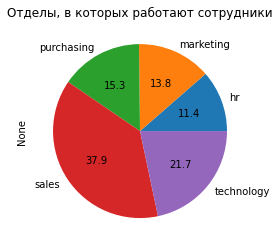

In [24]:
# построение круговой диаграммы
data_train.groupby('dept').size().plot(kind='pie', autopct='%.1f')
plt.title('Отделы, в которых работают сотрудники');

По круговой диаграмме видно, что большинство сотрудников работают в отделе sales (37.9%), на втором месте отдел technology (21.7%). Самым малочисленным отделом является hr (11.4%). 

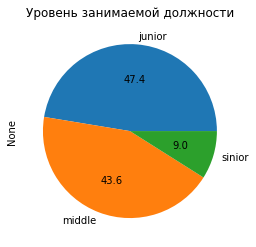

In [25]:
# построение круговой диаграммы
data_train.groupby('level').size().plot(kind='pie', autopct='%.1f')
plt.title('Уровень занимаемой должности');

По круговой диаграмме видно, что почти половина сотрудников занимают должность junior-специалиста (47.4%), при этом sinior-специалистов всего лишь 9%.

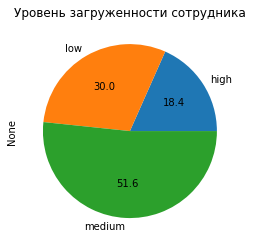

In [26]:
# построение круговой диаграммы
data_train.groupby('workload').size().plot(kind='pie', autopct='%.1f')
plt.title('Уровень загруженности сотрудника');

По круговой диаграмме видно, что чуть больше половины сотрудников загружены средне (51.6%), при этом лишь у 18.4% сотрудников загруженность высокая.

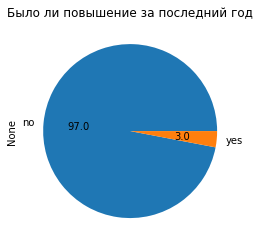

In [27]:
# построение круговой диаграммы
data_train.groupby('last_year_promo').size().plot(kind='pie', autopct='%.1f')
plt.title('Было ли повышение за последний год');

По данной круговой диаграме можно сказать, что только у 3% сотрудников было повышение за последний год.

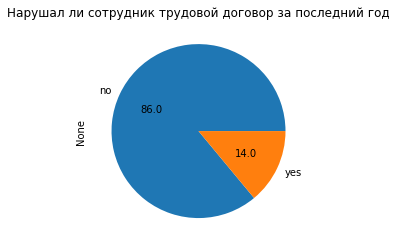

In [28]:
# построение круговой диаграммы
data_train.groupby('last_year_violations').size().plot(kind='pie', autopct='%.1f')
plt.title('Нарушал ли сотрудник трудовой договор за последний год');

По данной круговой диаграме можно сказать, что только у 14% сотрудников нарушали трудовой договор за последний год.

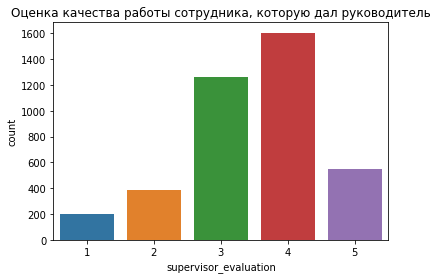

In [29]:
#построение countplot по столбцу employment_years
sns.countplot(x='supervisor_evaluation', data=data_train)
plt.title('Оценка качества работы сотрудника, которую дал руководитель');

По диаграмме можно сказать, что большиство сотрудников руководитель оценивает на 3 и 4.

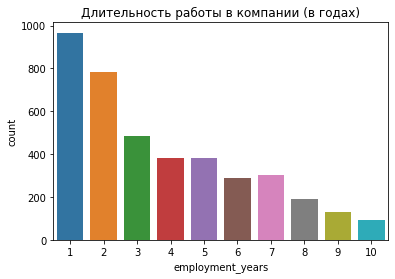

In [30]:
#построение countplot по столбцу employment_years
sns.countplot(x='employment_years', data=data_train)
plt.title('Длительность работы в компании (в годах)');

In [31]:
# вывод числового описания данных 
data_train['employment_years'].describe()

count    4000.000000
mean        3.718500
std         2.542513
min         1.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        10.000000
Name: employment_years, dtype: float64

По гистограмме видно, что большинство сотрудников работают в компании 1-3 года. Сотрудников, которые работают в компании более 5 лет гораздо меньше, чем сотрудников, которые работают менее 5 лет.

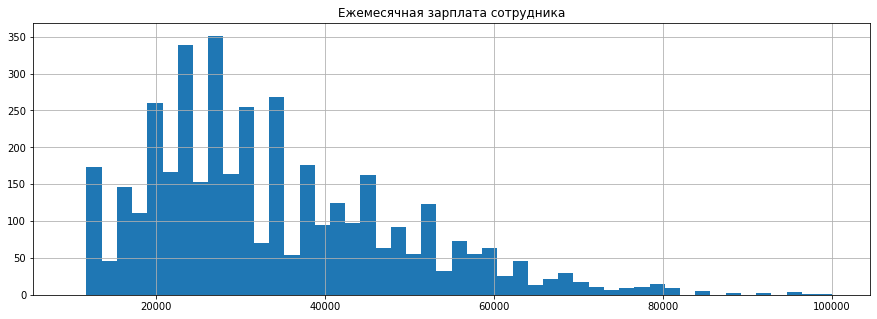

In [32]:
#построение гистограммы по столбцу salary
data_train['salary'].hist(bins=50, range = (10000, 100000), figsize=(15, 5));
plt.title('Ежемесячная зарплата сотрудника');

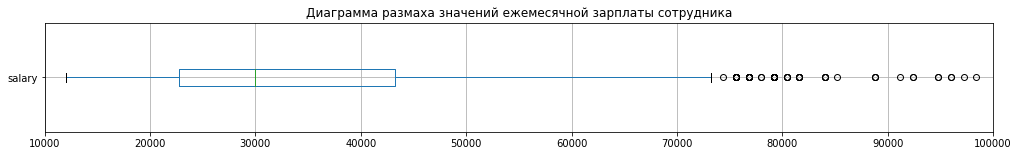

In [33]:
# построение диаграммы размаха по столбцу salary
fig, ax = plt.subplots(figsize = (17,2))
ax = data_train[['salary']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений ежемесячной зарплаты сотрудника')
ax.set_xlim(10000, 100000);

In [34]:
# вывод числового описания данных 
data_train['salary'].describe()

count     4000.000000
mean     33926.700000
std      14900.703838
min      12000.000000
25%      22800.000000
50%      30000.000000
75%      43200.000000
max      98400.000000
Name: salary, dtype: float64

График значений ежемесячной зарплаты сотрудников не имеет нормального распределения и имеет выбросы. Среднее значение зарплаты и медиана близки друг к другу.

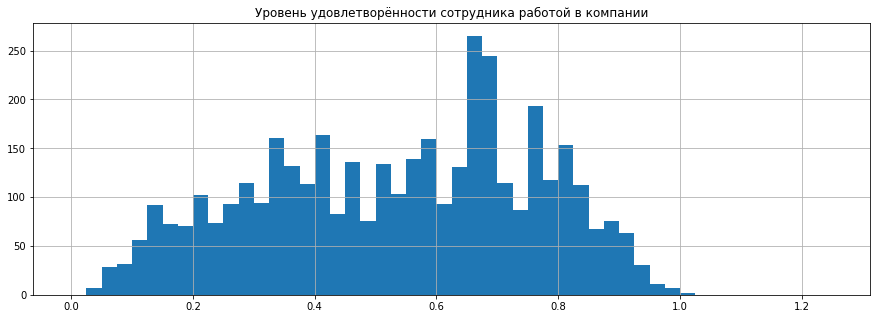

In [35]:
#построение гистограммы по столбцу job_satisfaction_rate
data_train['job_satisfaction_rate'].hist(bins=50, range = (0, 1.25), figsize=(15, 5))
plt.title('Уровень удовлетворённости сотрудника работой в компании');

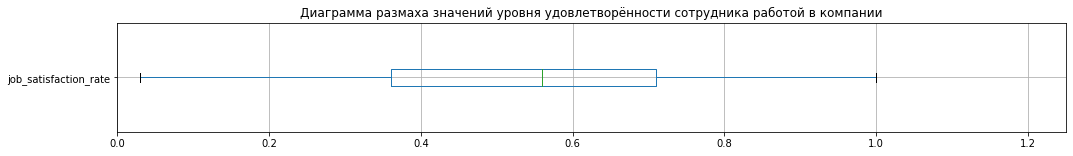

In [36]:
# построение диаграммы размаха по столбцу job_satisfaction_rate
fig, ax = plt.subplots(figsize = (17,2))
ax = data_train[['job_satisfaction_rate']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений уровня удовлетворённости сотрудника работой в компании')
ax.set_xlim(0, 1.25);

In [37]:
# вывод числового описания данных 
data_train['job_satisfaction_rate'].describe()

count    4000.000000
mean        0.533995
std         0.225327
min         0.030000
25%         0.360000
50%         0.560000
75%         0.710000
max         1.000000
Name: job_satisfaction_rate, dtype: float64

График значений уровня удовлетворённости сотрудника работой в компании не имеет нормального распределения и не имеет выбросы. Среднее значение уровня удовлетворенности и медиана близки друг к другу. Есть значения и 1, и 0.03, следовательно есть сотрудники, которые полностью удовлетворены своей работой, но есть и те, которым работа не нравится.

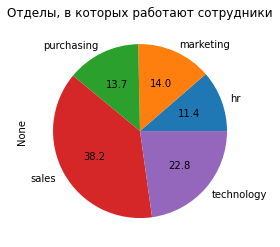

In [38]:
# построение круговой диаграммы
X_test.groupby('dept').size().plot(kind='pie', autopct='%.1f')
plt.title('Отделы, в которых работают сотрудники');

По круговой диаграмме видно, что большинство сотрудников работают в отделе sales (38.2%), на втором месте отдел technology (22.8%). Самым малочисленным отделом является hr (11.4%). 

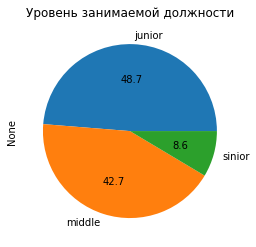

In [39]:
# построение круговой диаграммы
X_test.groupby('level').size().plot(kind='pie', autopct='%.1f')
plt.title('Уровень занимаемой должности');

По круговой диаграмме видно, что почти половина сотрудников занимают должность junior-специалиста (42.7%), при этом sinior-специалистов всего лишь 8.6%.

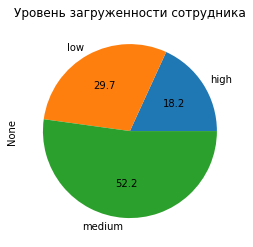

In [40]:
# построение круговой диаграммы
X_test.groupby('workload').size().plot(kind='pie', autopct='%.1f')
plt.title('Уровень загруженности сотрудника');

По круговой диаграмме видно, что чуть больше половины сотрудников загружены средне (52.2%), при этом лишь у 18.2% сотрудников загруженность высокая.

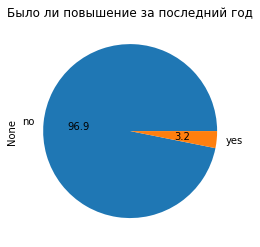

In [41]:
# построение круговой диаграммы
X_test.groupby('last_year_promo').size().plot(kind='pie', autopct='%.1f')
plt.title('Было ли повышение за последний год');

По данной круговой диаграме можно сказать, что только у 3.2% сотрудников было повышение за последний год.

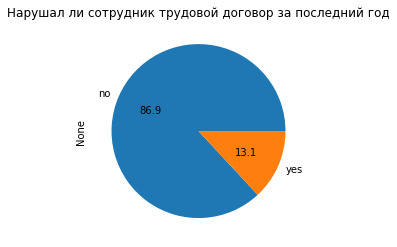

In [42]:
# построение круговой диаграммы
X_test.groupby('last_year_violations').size().plot(kind='pie', autopct='%.1f')
plt.title('Нарушал ли сотрудник трудовой договор за последний год');

По данной круговой диаграме можно сказать, что только у 13.1% сотрудников нарушали трудовой договор за последний год.

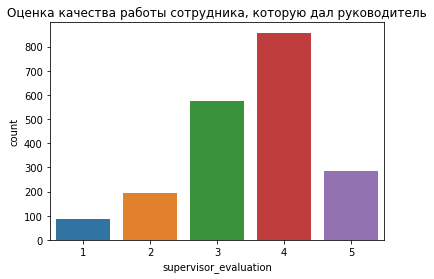

In [43]:
#построение countplot по столбцу employment_years
sns.countplot(x='supervisor_evaluation', data=X_test)
plt.title('Оценка качества работы сотрудника, которую дал руководитель');

По диаграмме можно сказать, что большиство сотрудников руководитель оценивает на 3 (28,7%) и 4 (42.8%). И только 4.4% сотрудникам руководитель ставит оценку 1.

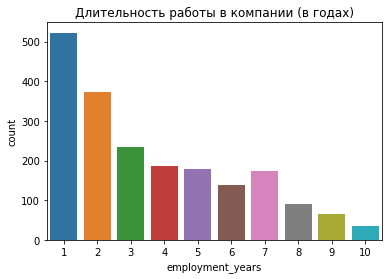

In [44]:
#построение countplot по столбцу employment_years
sns.countplot(x='employment_years', data=X_test)
plt.title('Длительность работы в компании (в годах)');

In [45]:
# вывод числового описания данных 
X_test['employment_years'].describe()

count    2000.000000
mean        3.666500
std         2.537222
min         1.000000
25%         1.000000
50%         3.000000
75%         6.000000
max        10.000000
Name: employment_years, dtype: float64

По гистограмме видно, что большинство сотрудников работают в компании год-два. Сотрудников, которые работают в компании более 5 лет гораздо меньше, чем сотрудников, которые работают менее 5 лет.

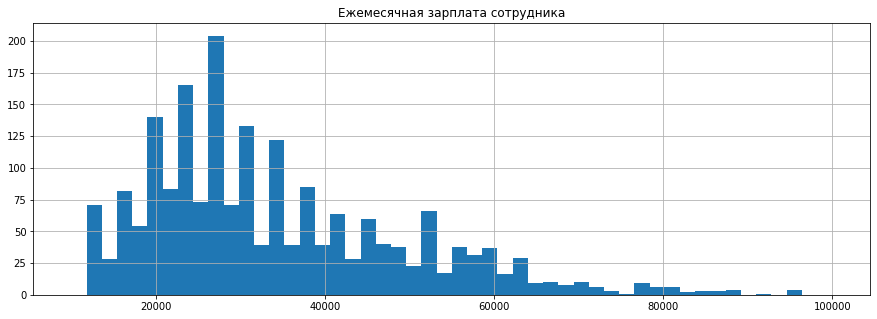

In [46]:
#построение гистаграммы по столбцу salary
X_test['salary'].hist(bins=50, range = (10000, 100000), figsize=(15, 5))
plt.title('Ежемесячная зарплата сотрудника');

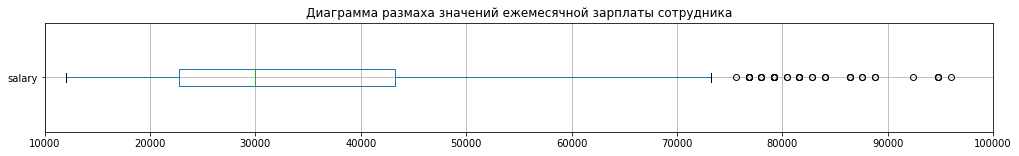

In [47]:
# построение диаграммы размаха по столбцу salary
fig, ax = plt.subplots(figsize = (17,2))
ax = X_test[['salary']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений ежемесячной зарплаты сотрудника')
ax.set_xlim(10000, 100000);

In [48]:
# вывод числового описания данных 
X_test['salary'].describe()

count     2000.000000
mean     34066.800000
std      15398.436729
min      12000.000000
25%      22800.000000
50%      30000.000000
75%      43200.000000
max      96000.000000
Name: salary, dtype: float64

График значений ежемесячной зарплаты сотрудников не имеет нормального распределения и имеет выбросы. Среднее значение зарплаты и медиана близки друг к другу.

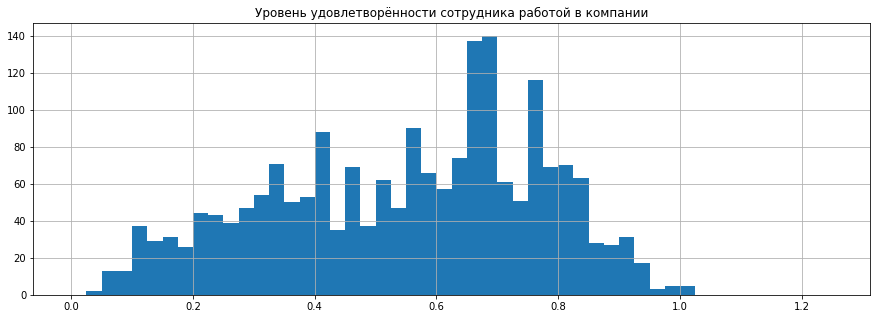

In [49]:
#построение гистаграммы по столбцу job_satisfaction_rate
y_test['job_satisfaction_rate'].hist(bins=50, range = (0, 1.25), figsize=(15, 5))
plt.title('Уровень удовлетворённости сотрудника работой в компании');

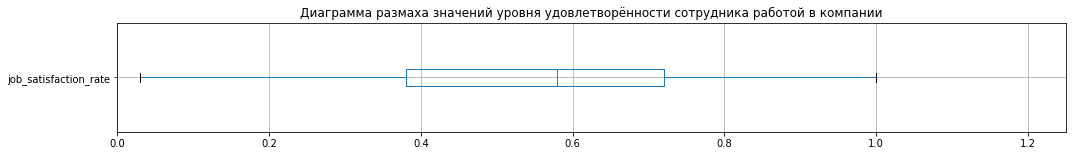

In [50]:
# построение диаграммы размаха по столбцу job_satisfaction_rate
fig, ax = plt.subplots(figsize = (17,2))
ax = y_test[['job_satisfaction_rate']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений уровня удовлетворённости сотрудника работой в компании')
ax.set_xlim(0, 1.25);

In [51]:
# вывод числового описания данных 
y_test['job_satisfaction_rate'].describe()

count    2000.00000
mean        0.54878
std         0.22011
min         0.03000
25%         0.38000
50%         0.58000
75%         0.72000
max         1.00000
Name: job_satisfaction_rate, dtype: float64

График значений уровня удовлетворённости сотрудника работой в компании не имеет нормального распределения и не имеет выбросы. Среднее значение уровня удовлетворенности и медиана близки друг к другу. Есть значения и 1, и 0.03, следовательно есть сотрудники, которые полностью удовлетворены своей работой, но есть и те, которым работа не нравится.

**Вывод по результатам исследовательского анализа данных:**\
В результате выполнения исследовательского анализа данных можно сказать, что большиство сотрудников работают в отделе sales (37.9%) и занимают должность junior-специалиста (47,4%). Загруженность у половины сотрудников находится на среднем уровне (51.6%). И только у 3% сотрдников было повышение за последний год. Руководители оценивают работу сотрудников в большистве случаев на 3 и 4 балла. Также можно сказать, что в компании преобладают сотрудники, проработавшие год-два. Зарплата большиства сотрудников находится в диапазоне от 20000 до 40000. Оценка удовлетворенности сотрудника работой в компании распределяется в диапазоне от 0.03 до 1, что говорит о том, что в компании есть сотрудники, которые полностью удовлетворены своей работой, но есть и те, которым работа не нравится.

## Корреляционный анализ

In [52]:
# опредление коэффициентов с помощью phik_matrix()
data_train[['dept', 
            'level',
            'workload',
            'employment_years',
            'last_year_promo',
            'last_year_violations',
            'supervisor_evaluation',
            'salary',
            'job_satisfaction_rate']
].phik_matrix(interval_cols=['employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate'])

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
dept,1.000000,0.000000,0.016509,0.037853,0.000000,0.000000,0.105495,0.282265,0.082086
level,0.000000,1.000000,0.419114,0.682773,0.101613,0.000000,0.000000,0.717630,0.080620
workload,0.016509,0.419114,1.000000,0.181941,0.058663,0.000000,0.037023,0.788820,0.056128
employment_years,0.037853,0.682773,0.181941,1.000000,0.183579,0.056808,0.000000,0.483419,0.325603
last_year_promo,0.000000,0.101613,0.058663,0.183579,1.000000,0.000000,0.013681,0.215025,0.190803
last_year_violations,0.000000,0.000000,0.000000,0.056808,0.000000,1.000000,0.182042,0.010078,0.560348
supervisor_evaluation,0.105495,0.000000,0.037023,0.000000,0.013681,0.182042,1.000000,0.000000,0.764364
salary,0.282265,0.717630,0.788820,0.483419,0.215025,0.010078,0.000000,1.000000,0.165830
job_satisfaction_rate,0.082086,0.080620,0.056128,0.325603,0.190803,0.560348,0.764364,0.165830,1.000000


In [53]:
# объединение целевого и входных признаков тестовой выборки с целью совпадения по id
data_test = pd.merge(X_test, y_test, on='id', how = 'outer')
data_test.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,485046,marketing,junior,medium,2,no,no,5,28800,0.79
1,686555,hr,junior,medium,1,no,no,4,30000,0.72
2,467458,sales,middle,low,5,no,no,4,19200,0.64
3,418655,sales,middle,low,6,no,no,4,19200,0.60
4,789145,hr,middle,medium,5,no,no,5,40800,0.75


In [54]:
# опредление коэффициентов с помощью phik_matrix()
data_test[['dept', 
           'level',
           'workload',
           'employment_years',
           'last_year_promo',
           'last_year_violations',
           'supervisor_evaluation',
           'salary',
           'job_satisfaction_rate']
].phik_matrix(interval_cols=['salary', 'job_satisfaction_rate'])

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
dept,1.000000,0.000000,0.033894,0.000000,0.000000,0.000000,0.060917,0.330406,0.075774
level,0.000000,1.000000,0.474151,0.689666,0.118258,0.017527,0.000000,0.748998,0.095706
workload,0.033894,0.474151,1.000000,0.202240,0.035609,0.000000,0.036353,0.785849,0.052308
employment_years,0.000000,0.689666,0.202240,1.000000,0.173637,0.066371,0.000000,0.494701,0.313525
last_year_promo,0.000000,0.118258,0.035609,0.173637,1.000000,0.000000,0.011704,0.193727,0.337002
last_year_violations,0.000000,0.017527,0.000000,0.066371,0.000000,1.000000,0.189719,0.000000,0.554811
supervisor_evaluation,0.060917,0.000000,0.036353,0.000000,0.011704,0.189719,1.000000,0.114588,0.769857
salary,0.330406,0.748998,0.785849,0.494701,0.193727,0.000000,0.114588,1.000000,0.171903
job_satisfaction_rate,0.075774,0.095706,0.052308,0.313525,0.337002,0.554811,0.769857,0.171903,1.000000


По данным расчета коэффициентов корелляции тренировочной выборки можно сказать, что высокая прямая связь между целевым признаком job_satisfaction_rate и входным признаком supervisor_evaluation, заметная прямая связь между job_satisfaction_rate и last_year_violations. По полученной матрице корреляции можно сделать вывод, что мультиколлинеарность между признаками отсутствует. Значение коэффициентов корреляции тестовой выборки схожи со значениями тренировочной выборки.

## Подготовка данных

In [55]:
RANDOM_STATE = 42

In [56]:
data_train = data_train.drop(columns=['id'])

In [57]:
data_train.duplicated().sum()

245

In [58]:
#удаление дубликатов в датафрейме data_train
data_train = data_train.drop_duplicates().reset_index(drop=True)

In [59]:
X_train = data_train.drop(columns=['job_satisfaction_rate'])

In [60]:
y_train = data_train['job_satisfaction_rate']

In [61]:
# создание списков с названиями категориальных признаков
ohe_columns = ['dept','last_year_promo', 'last_year_violations']

In [62]:
# создание списков с названиями категориальных признаков
ord_columns = ['level', 'workload']

In [63]:
# создание списков с названиями количественных признаков
num_columns = ['employment_years', 'salary', 'supervisor_evaluation']

In [64]:
# создание пайплайна для подготовки признаков из списка ohe_columns
ohe_pipe = Pipeline([('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
                     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output = False))
                    ]
                   )

In [65]:
# создание пайплайна для подготовки признаков из списка ord_columns
ord_pipe = Pipeline([('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
                     ('ord', OrdinalEncoder(
                         categories=[
                             ['junior', 'middle', 'sinior'],
                             ['low', 'medium', 'high']
                         ], handle_unknown='use_encoded_value', unknown_value=np.nan)
                     ),
                     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')
                     )
                    ]
                   )

In [66]:
# создание общего пайплайна для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough'
)

In [67]:
# создание итогового пайплайна: подготовка данных и модель
pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeRegressor(random_state=RANDOM_STATE))
    ]
)

**Вывод по результатам подготовки данных:**\
На этапе подготовки данных была определена тренировочная выборка, созданы списки для категориальных и количесвенных признаков, чтобы затем создать пайплайны для их кодирования и масштабирования. В результате выполнения был создан итоговый пайплайн: подготовки данных и модели. 

## Обучение моделей

In [68]:
param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__max_depth': range (1, 20),
        'models__max_features': range (1, 20),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']  
    },
   # словарь для модели LinearRegression()
    {
        'models': [LinearRegression(
        )],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']      
    }
]

In [69]:
# создание функции с расчетом метрики
def custom_metric(a, f):
    return 1/len(f)*np.sum (2*np.abs (a-f)/(np.abs(a) + np.abs(f))*100)

In [70]:
smape = make_scorer(custom_metric, greater_is_better=False)

In [71]:
# обучение модели на тренировочных данных
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid,
    cv=5,
    scoring=smape,
    n_jobs=-1,
    random_state=RANDOM_STATE
)

In [72]:
randomized_search.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на кросс-валидации:', -randomized_search.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                            

In [73]:
# удаление столбцов id из тестовой выборки
X_test = X_test.drop(columns=['id'])

In [74]:
y_test_rate = data_test['job_satisfaction_rate']

In [75]:
# получение предсказаний на тестовой выборке при помощи лучшей модели
best_model = randomized_search.best_estimator_
y_pred = best_model.predict(X_test)

In [76]:
# определение SMAPE для тестовой выборки
smape_value = custom_metric(y_test_rate, y_pred)
smape_value

14.179849384798588

**Вывод по результатам обучения моделей:**\
На данном этапе для обучения были выбраны две модели: DecisionTreeRegressor, LinearRegression с различными гиперпараметрами. Также была рассчитана метрика SMAPE, определившая качество лучшей модели. В результате обучения лучшей моделью стала DecisionTreeRegressor со значениями гиперпараметров равными max_depth=15, max_features=8. Значение метрики  SMAPE на кросс-валидации - 15.79, на тестовой выборке - 14.18.

## Вывод по задаче 1

В результате решения задачи 1 были выполнены следующие этапы:
- Предобработка данных. На данном этапе были обработаны все датафреймы и внесены заменены пустые строки значениями Nan.
- Исследовательский анализ данных. Было исследовано распределение сотрудников по отделам, их загруженность, количество повышений на последний год, оценка руководителей, зарплата и тд.
- Подготовка данных. Данные были подготовлены для дальнейшего обучения моделей.
- Обучение моделей. Лучшая модель DecisionTreeRegressor со значениями гиперпараметров равными max_depth=15, max_features=8. Значение метрики SMAPE на кросс-валидации - 15.79, на тестовой выборке - 14.18.
    

# Задача 2: предсказание увольнения сотрудника из компании

Для этой задачи будем использовать те же входные признаки, что и в предыдущей задаче. В качестве целевого признака будем использовать quit — увольнение сотрудника из компании.

## Загрузка данных

In [77]:
#считывание csv-файлов и сохранение в датафреймы
data_train_quit = pd.read_csv('/datasets/train_quit.csv', sep=',')
X_test_quit = pd.read_csv('/datasets/test_features.csv', sep=',')
y_test_quit = pd.read_csv('/datasets/test_target_quit.csv', sep=',')

In [78]:
# получение первых 10 строк датафрейма data_train_quit
data_train_quit.head(10)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no
5,699916,sales,junior,low,1,no,yes,3,18000,yes
6,417070,technology,middle,medium,8,no,no,2,44400,no
7,165489,sales,middle,low,4,no,no,5,19200,no
8,996399,marketing,middle,low,7,no,no,4,25200,no
9,613206,technology,middle,medium,2,no,no,3,45600,yes


In [79]:
# вывод основной информации о датафрейме data_train_quit
data_train_quit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


In [80]:
# получение первых 10 строк датафрейма X_test_quit
X_test_quit.head(10)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800
5,429973,purchasing,middle,medium,6,no,no,3,42000
6,850699,technology,junior,medium,3,no,no,3,26400
7,500791,sales,middle,high,9,no,no,4,49200
8,767867,marketing,middle,high,3,no,yes,4,62400
9,937235,sales,junior,medium,1,no,yes,3,26400


In [81]:
# вывод основной информации о датафрейме X_test_quit
X_test_quit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


In [82]:
# получение первых 10 строк датафрейма data_train_quit
y_test_quit.head(10)

,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes
5,223063,no
6,810370,no
7,998900,no
8,578329,no
9,648850,no


In [83]:
# вывод основной информации о датафрейме X_test_quit
y_test_quit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


**Вывод по результатам загрузки данных:**\
На этапе загрузки данных были изучены датафреймы data_train_quit, X_test_quit, y_test_quit, а также основная информация о данных датафреймах.

## Предобработка данных

In [84]:
# подсчет количества пропусков в датафрейме data_train_quit
data_train_quit.isna().sum()

id                       0
dept                     0
level                    0
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
quit                     0
dtype: int64

In [85]:
# подсчет количества пропусков в датафрейме X_test_quit
X_test_quit.isna().sum()

id                       0
dept                     2
level                    1
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
dtype: int64

In [86]:
# подсчет количества пропусков в датафрейме y_test_quit
y_test_quit.isna().sum()

id      0
quit    0
dtype: int64

In [87]:
# определение уникальных значений столбца dept
X_test_quit['dept'].unique()

array(['marketing', 'hr', 'sales', 'purchasing', 'technology', nan, ' '],
      dtype=object)

In [88]:
# заменим пустые значения в столбце dept на nan
X_test_quit['dept']=X_test_quit['dept'].replace(' ', np.nan)

In [89]:
# определение уникальных значений столбца level
X_test_quit['level'].unique()

array(['junior', 'middle', 'sinior', nan], dtype=object)

In [90]:
# определение уникальных значений столбца workload
X_test_quit['workload'].unique()

array(['medium', 'low', 'high', ' '], dtype=object)

In [91]:
# заменим пустые значения в столбце workload на nan
X_test_quit['workload']=X_test_quit['workload'].replace(' ', np.nan)

In [92]:
# определение количества дубликатов в датафрейме data_train
data_train_quit.duplicated().sum()

0

In [93]:
# определение количества дубликатов в датафрейме data_train
X_test_quit.duplicated().sum()

0

In [94]:
# определение количества дубликатов в датафрейме data_train
y_test_quit.duplicated().sum()

0

**Вывод по итогам предобработки данных:**\
На этапе предобработки данных было выявлено, что датафрейм X_test_quit содержит пропуски в стобцах dept, level. Также были заменены пустые строки на nan в столбцах dept, workload датафрейма X_test_quit. Дубликатов в процессе предобработки данных выявлено не было.

## Исследовательский анализ

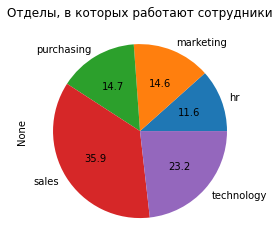

In [95]:
# построение круговой диаграммы
data_train_quit.groupby('dept').size().plot(kind='pie', autopct='%.1f')
plt.title('Отделы, в которых работают сотрудники');

По данным круговой диаграммы видно, что больше половины сотрудников работают в отделах sales и technology. Количество людей, работающих в остальных отделах распределео примерно поровну и составляет 14%.

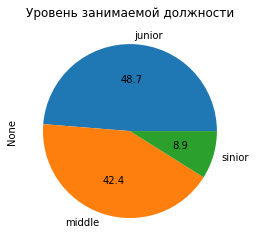

In [96]:
# построение круговой диаграммы
data_train_quit.groupby('level').size().plot(kind='pie', autopct='%.1f')
plt.title('Уровень занимаемой должности');

Уровень занимаемой должности junior лидирует и составляет чуть меньше половины от всего количества работников, на втором месте middle, занимающий 42,4%. Намного меньше сотрудников, обладающих уровнем sinior, состаялющим всего лишь 8.9%

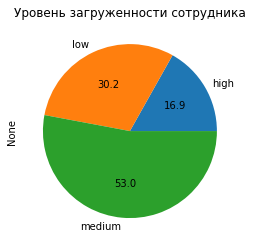

In [97]:
# построение круговой диаграммы
data_train_quit.groupby('workload').size().plot(kind='pie', autopct='%.1f')
plt.title('Уровень загруженности сотрудника');

Больше половины сотрудников имеют средний уровень загруженности, треть - низкий, 16.9% - высокий

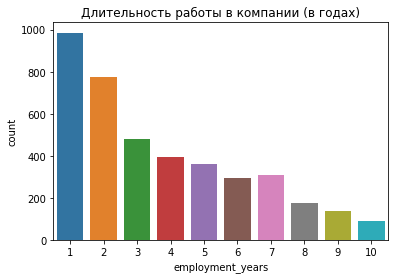

In [98]:
#построение countplot по столбцу employment_years
sns.countplot(x='employment_years', data=data_train_quit)
plt.title('Длительность работы в компании (в годах)');

Чем больше работников в компании, тем меньше длительность их работы в компании. Меньше всего сотрудников, работающмх 10 лет, больше всего - 1 год.

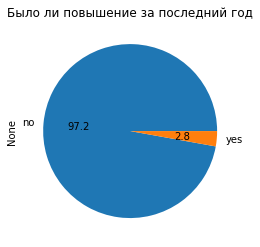

In [99]:
# построение круговой диаграммы
data_train_quit.groupby('last_year_promo').size().plot(kind='pie', autopct='%.1f')
plt.title('Было ли повышение за последний год');

Лишь у 2.8% сотрудников было повышение за последний год.

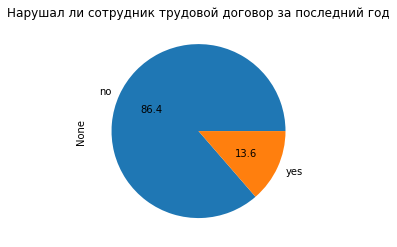

In [100]:
# построение круговой диаграммы
data_train_quit.groupby('last_year_violations').size().plot(kind='pie', autopct='%.1f')
plt.title('Нарушал ли сотрудник трудовой договор за последний год');

Трудовой договор нарушали 13.6% сотрудников.

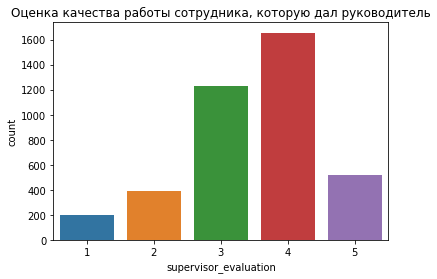

In [101]:
#построение countplot по столбцу employment_years
sns.countplot(x='supervisor_evaluation', data=data_train_quit)
plt.title('Оценка качества работы сотрудника, которую дал руководитель');

Более 2/3 руководителей оценивают работу своих сотрудников на оценки "4" и "3". Одинаково часто руководители оценивают работников на оценки "5" и "2". Реже всего ставят "1"

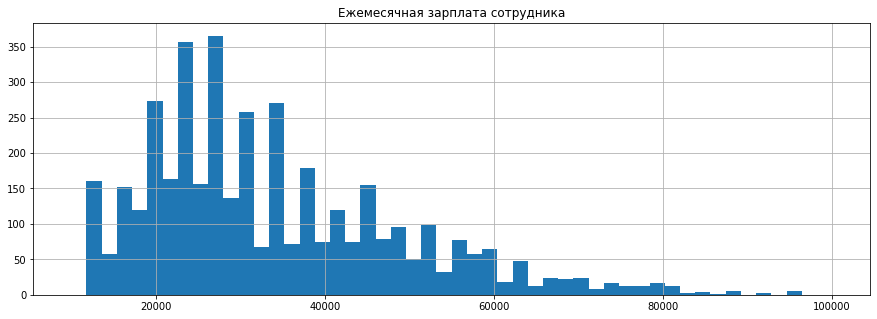

In [102]:
#построение гистограммы по столбцу salary
data_train_quit['salary'].hist(bins=50, range = (10000, 100000), figsize=(15, 5));
plt.title('Ежемесячная зарплата сотрудника');

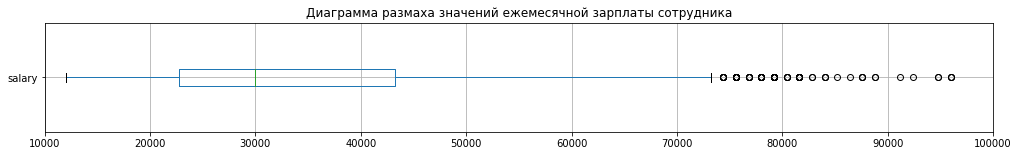

In [103]:
# построение диаграммы размаха по столбцу salary
fig, ax = plt.subplots(figsize = (17,2))
ax = data_train_quit[['salary']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений ежемесячной зарплаты сотрудника')
ax.set_xlim(10000, 100000);

In [104]:
data_train_quit['salary'].describe()

count     4000.000000
mean     33805.800000
std      15152.415163
min      12000.000000
25%      22800.000000
50%      30000.000000
75%      43200.000000
max      96000.000000
Name: salary, dtype: float64

По данным графиков можно сказать, что гистограмма не имеет нормального распределения, по диаграмме размаха видно большое количество выбросов с правой стороны, а по числовому описанию можно сделать вывод, что среднее и медиана близки друг к другу, но стандартное отклонение довольно велико.

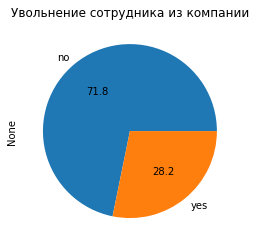

In [105]:
# построение круговой диаграммы
data_train_quit.groupby('quit').size().plot(kind='pie', autopct='%.1f')
plt.title('Увольнение сотрудника из компании');

Почти треть сотрудников увольняется из компании.

In [106]:
# создание датафрейма для уволившихся сотрудников
quit_yes = data_train_quit[data_train_quit['quit'] == 'yes']

In [107]:
# создание датафрейма для оставшихся сотрудников
quit_no = data_train_quit[data_train_quit['quit'] == 'no']

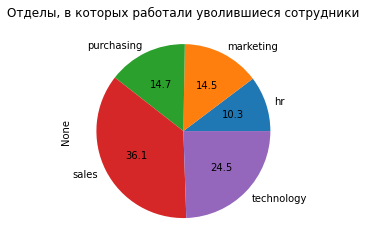

In [108]:
# построение круговой диаграммы
quit_yes.groupby('dept').size().plot(kind='pie', autopct='%.1f')
plt.title('Отделы, в которых работали уволившиеся сотрудники');

Данная круговая диаграмма схожа с круговой диаграммой всех сотрудников компании.

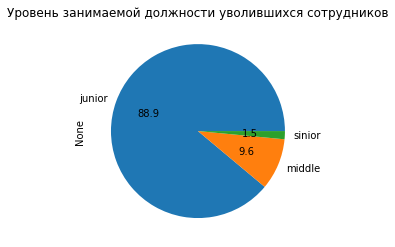

In [109]:
# построение круговой диаграммы
quit_yes.groupby('level').size().plot(kind='pie', autopct='%.1f')
plt.title('Уровень занимаемой должности уволившихся сотрудников');

Большая часть уволившихся сотрудников имела уровень занимаемой должности - junior. Чуть меньше 10% уволившихся сотрудников имела уровень занимаемой должности - middle. Возможно, увольнение подавляющего большинства сотрудников с уровнем занимаемой должности junior связана с тем, что данные сотрудники пришли в компанию получить первоначальный опыт и уйти в другую компанию с более выгодными условиями для них.

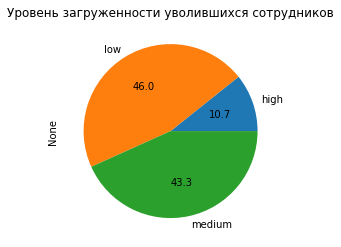

In [110]:
# построение круговой диаграммы
quit_yes.groupby('workload').size().plot(kind='pie', autopct='%.1f')
plt.title('Уровень загруженности уволившихся сотрудников');

По сравнению с круговой диаграммой всех сотрудников, по данной диаграмме видно, что около половины уволившихся сотрудников имела низкий уровень загруженности и чуть меньше со средним уровнем загруженности.   

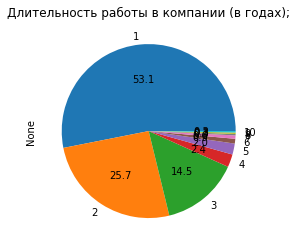

In [111]:
# построение круговой диаграммы
quit_yes.groupby('employment_years').size().plot(kind='pie', autopct='%.1f')
plt.title('Длительность работы в компании (в годах);');

По данной гистограмме видно, что большая часть уволившихся сотрудников ушла в первый год работы, а если говорить в целом, то почти все сотрудники уволились в первые 3 года работы.

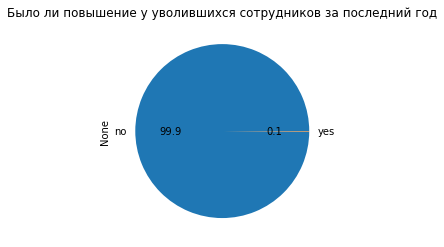

In [112]:
# построение круговой диаграммы
quit_yes.groupby('last_year_promo').size().plot(kind='pie', autopct='%.1f')
plt.title('Было ли повышение у уволившихся сотрудников за последний год');

По данной гистограмме видно, что уволившиеся сотрудники не были повышены, что также могло стать причиной для увольнения.

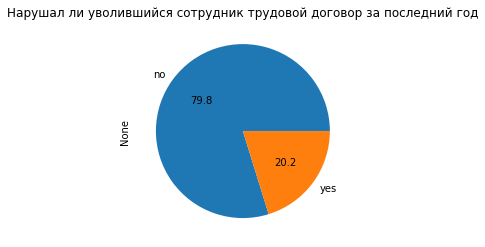

In [113]:
# построение круговой диаграммы
quit_yes.groupby('last_year_violations').size().plot(kind='pie', autopct='%.1f')
plt.title('Нарушал ли уволившийся сотрудник трудовой договор за последний год');

Большая часть уволившихся сотрудников не нарушала трудовой договор, но они нарушали больше по сравнению со всеми сотрудниками.

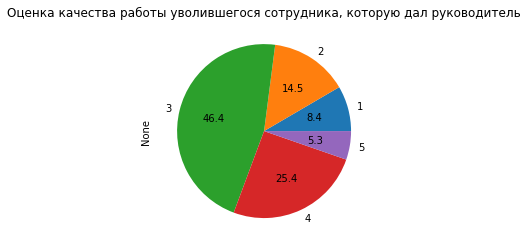

In [114]:
# построение круговой диаграммы
quit_yes.groupby('supervisor_evaluation').size().plot(kind='pie', autopct='%.1f')
plt.title('Оценка качества работы уволившегося сотрудника, которую дал руководитель');

По данному графику видно, что почти половине уволившихся сотрудников давали оценку "3". По сравнению с графиком всех сотрудников можно сказать, что уволившихся сотрудников оценивали несколько хуже.

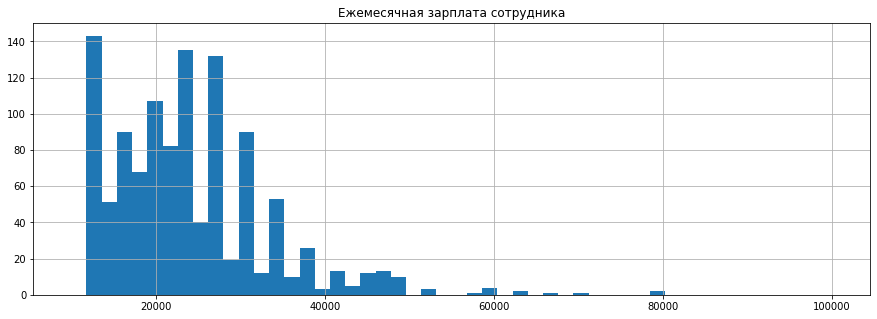

In [115]:
#построение гистограммы по столбцу salary
quit_yes['salary'].hist(bins=50, range = (10000, 100000), figsize=(15, 5))
plt.title('Ежемесячная зарплата сотрудника');

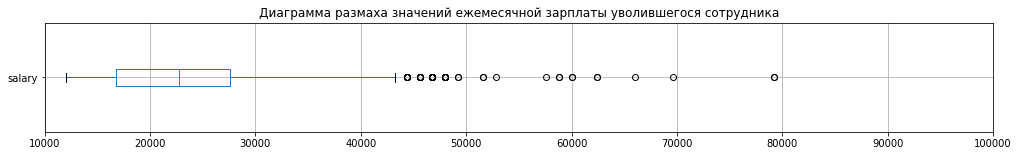

In [116]:
# построение диаграммы размаха по столбцу salary
fig, ax = plt.subplots(figsize = (17,2))
ax = quit_yes[['salary']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений ежемесячной зарплаты уволившегося сотрудника')
ax.set_xlim(10000, 100000);

In [117]:
quit_yes['salary'].describe()

count     1128.000000
mean     23885.106383
std       9351.599505
min      12000.000000
25%      16800.000000
50%      22800.000000
75%      27600.000000
max      79200.000000
Name: salary, dtype: float64

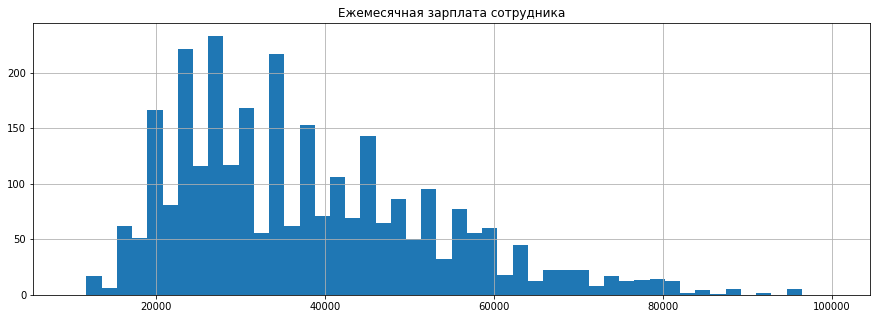

In [118]:
#построение гистограммы по столбцу salary
quit_no['salary'].hist(bins=50, range = (10000, 100000), figsize=(15, 5))
plt.title('Ежемесячная зарплата сотрудника');

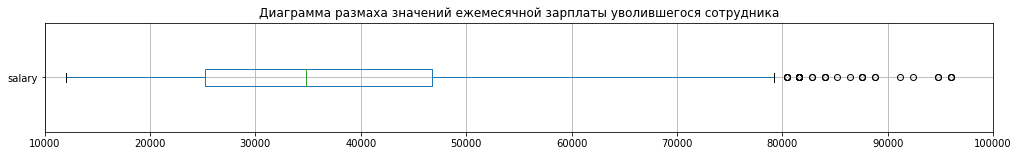

In [119]:
# построение диаграммы размаха по столбцу salary
fig, ax = plt.subplots(figsize = (17,2))
ax = quit_no[['salary']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений ежемесячной зарплаты уволившегося сотрудника')
ax.set_xlim(10000, 100000);

In [120]:
quit_no['salary'].describe()

count     2872.000000
mean     37702.228412
std      15218.977339
min      12000.000000
25%      25200.000000
50%      34800.000000
75%      46800.000000
max      96000.000000
Name: salary, dtype: float64

По данным графиков можно сказать, что уволившиеся сотрудники получили меньше в сравнении со всеми сотрудниками. Это связано с тем, что большая часть уволившихся сотрудников имела уровень занимаемой должности junior. Также стоит отметить, что среднее значение зарплаты уволившихся сотрудников на 14000 меньше, чем среднее значение зарплаты оставшихся сотрудников.

In [121]:
#объединение таблиц y_test и y_test_quit по столбцy id
rate_quit = pd.merge(y_test, y_test_quit, on='id', how = 'outer')

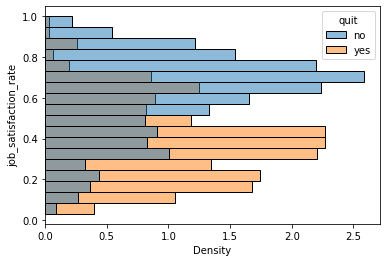

In [122]:
sns.histplot(data=rate_quit, y="job_satisfaction_rate", hue='quit' , stat='density', common_norm=False);

По данным гистограммы сотрудников, уволившихся из компании и оставшихся можно сказать, что уволившиеся сотрудники были менее удовлетворены работой, чем те кто остался. Это подтверждается построенным графиком, где желтым цветом показаны уволившиеся сотрудники, а синим оставшиеся.

**Вывод по итогам исследовательского анализа данных:**\
В результате выполнения исследовательского анализа данных можно сказать, что большинство сотрудников, информация о которых содержится в датафрейме data_train_quit, работают в отделе sales (35.9%) и занимают должность junior-специалиста (48,7%). Загруженность у половины сотрудников находится на среднем уровне (53%). И только у 2,8% сотрдников было повышение за последний год. Руководители оценивают работу сотрудников в большистве случаев на 3 и 4 балла. Также можно сказать, что в компании преобладают сотрудники, проработавшие год-два. Зарплата большиства сотрудников находится в диапазоне от 20000 до 50000. По круговой диаграмме целевого признака видно, что 28,2% сотруудников уволились из компании.
По данным об уволившихся сотрудниках датафрейма quit_yes и построенным графикам можно сделать вывод, что большинство сотрудников работали в отделе sales (36.1%) и занимали должность junior-специалиста (88,9%). Загруженность у этих сотрудников находился на низком уровне (46%), а также почти ни у кого не было повышения за последний год. Руководители оценивали работу уволившихся сотрудников в большистве случаев на 3 балла. Также можно сказать, что в половине случаев сотрудники уходили спустя 1 год работы. Зарплата большиства уволившихся сотрудников находилась в диапазоне от 10000 до 30000. Также стоит отметить, что удовлетворенность работой у уволившихся сотрудников была ниже, чем у тех, кто остался в компании.

## Добавление нового входного признака

In [123]:
# удаление из датафрейма X_train_quit столбца quit
X_train_quit = data_train_quit.drop(columns=['quit'])
data_train_quit

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no
...,...,...,...,...,...,...,...,...,...,...
3995,588809,sales,junior,medium,4,no,no,3,26400,no
3996,672059,sales,middle,high,9,no,no,4,52800,no
3997,536432,purchasing,junior,low,2,no,yes,4,12000,yes
3998,692133,purchasing,middle,medium,2,no,no,4,33600,no


In [124]:
data_train_quit[['dept', 
            'level',
            'workload',
            'employment_years',
            'last_year_promo',
            'last_year_violations',
            'supervisor_evaluation',
            'salary',
            'quit']
].phik_matrix(interval_cols=['employment_years', 'supervisor_evaluation', 'salary'])

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
dept,1.000000,0.000000,0.000000,0.000000,0.000000,0.044274,0.042772,0.280300,0.000000
level,0.000000,1.000000,0.479480,0.692676,0.110585,0.000000,0.007189,0.745104,0.312799
workload,0.000000,0.479480,1.000000,0.213013,0.044388,0.014063,0.000000,0.793876,0.132243
employment_years,0.000000,0.692676,0.213013,1.000000,0.156494,0.000000,0.000000,0.491915,0.659093
last_year_promo,0.000000,0.110585,0.044388,0.156494,1.000000,0.000000,0.032376,0.215043,0.157370
last_year_violations,0.044274,0.000000,0.014063,0.000000,0.000000,1.000000,0.179228,0.086087,0.185071
supervisor_evaluation,0.042772,0.007189,0.000000,0.000000,0.032376,0.179228,1.000000,0.055330,0.245489
salary,0.280300,0.745104,0.793876,0.491915,0.215043,0.086087,0.055330,1.000000,0.564154
quit,0.000000,0.312799,0.132243,0.659093,0.157370,0.185071,0.245489,0.564154,1.000000


In [125]:
# определение предсказаний по данным датафрейма X_train_quit
y_pred = best_model.predict(X_train_quit)

In [126]:
# преобразование массива в датафрейм
y_pred = pd.DataFrame(data=y_pred)

In [127]:
# объединение таблиц
new_X_train_quit = pd.concat([X_train_quit, y_pred], axis=1, join="inner")
new_X_train_quit.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,0
0,723290,sales,middle,high,2,no,no,4,54000,0.634444
1,814010,sales,junior,medium,2,no,no,4,27600,0.846364
2,155091,purchasing,middle,medium,5,no,no,1,37200,0.350000
3,257132,sales,junior,medium,2,no,yes,3,24000,0.380000
4,910140,marketing,junior,medium,2,no,no,5,25200,0.690000


In [128]:
new_X_train_quit = new_X_train_quit.drop(columns=['id'])

In [129]:
# замена наименования столбца
new_X_train_quit = new_X_train_quit.rename(columns={0:'job_satisfaction_rate'})

In [130]:
# определение предсказаний по данным датафрейма X_test_quit
y_pred_test = best_model.predict(X_test_quit)

In [131]:
# преобразование массива в датафрейм
y_pred_test = pd.DataFrame(data=y_pred_test)

In [132]:
# объединение таблиц
new_X_test_quit = pd.concat([X_test_quit, y_pred_test], axis=1, join="inner")
new_X_test_quit.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,0
0,485046,marketing,junior,medium,2,no,no,5,28800,0.866667
1,686555,hr,junior,medium,1,no,no,4,30000,0.672727
2,467458,sales,middle,low,5,no,no,4,19200,0.654000
3,418655,sales,middle,low,6,no,no,4,19200,0.655000
4,789145,hr,middle,medium,5,no,no,5,40800,0.835294


In [133]:
# замена наименования столбца
new_X_test_quit = new_X_test_quit.rename(columns={0:'job_satisfaction_rate'})

In [134]:
# объединение входных и целевого признаков в один датафрейм
data_test_quit = pd.merge(new_X_test_quit, y_test_quit, on='id', how = 'outer')

In [135]:
# выделение из датафрейма data_train_quit целевого признака
y_train_quit = data_train_quit['quit']

In [136]:
# выделение из датафрейма data_test_quit целевого признака
y_test_quit = data_test_quit['quit']

In [137]:
# кодирование целевого признака в тестовой и тренировочной выборках
label_encoder = LabelEncoder()
y_train_quit = label_encoder.fit_transform(y_train_quit)
y_test_quit = label_encoder.transform(y_test_quit)

In [138]:
# определение классов целевого признака
label_encoder.classes_

array(['no', 'yes'], dtype=object)

In [139]:
# определение порядка классов
pred_classes = [0, 1]
print(label_encoder.inverse_transform(pred_classes)) 

['no' 'yes']


In [140]:
# создание списков с названиями категориальных признаков
ohe_columns = ['dept', 'last_year_promo', 'last_year_violations']
# создание списков с названиями категориальных признаков
ord_columns = ['level', 'workload']
# создание списков с названиями количественных признаков
num_columns = ['employment_years', 'salary', 'supervisor_evaluation', 'job_satisfaction_rate']

In [141]:
# создание пайплайна для подготовки признаков из списка ohe_columns
ohe_pipe = Pipeline([('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
                     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output = False))
                    ]
                   )
# создание пайплайна для подготовки признаков из списка ord_columns
ord_pipe = Pipeline([('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
                     ('ord', OrdinalEncoder(
                         categories=[
                             ['junior', 'middle', 'sinior'],
                             ['low', 'medium', 'high']
                         ], handle_unknown='use_encoded_value', unknown_value=np.nan)
                     ),
                     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')
                     )
                    ]
                   )

In [142]:
# создание общего пайплайна для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough'
)
# создание итогового пайплайна: подготовка данных и модель
pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
    ]
)

In [143]:
param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range (1, 20),
        'models__max_features': range (1, 20),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
   # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l2'
        )],
        'models__C': range (1,20),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
   # словарь для модели SVC()
    {
        'models': [SVC(
            random_state=RANDOM_STATE, probability=True
        )],
        'models__kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]

In [144]:
randomized_search_2 = RandomizedSearchCV(
    pipe_final, 
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=RANDOM_STATE
)

In [145]:
randomized_search_2.fit(new_X_train_quit, y_train_quit)

print('Лучшая модель и её параметры:\n\n', randomized_search_2.best_estimator_)
print ('Метрика лучшей модели на кросс-валидации:', randomized_search_2.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                            

In [146]:
# удаление столбца из тестовой выборки
new_X_test_quit= new_X_test_quit.drop(columns=['id'])

In [147]:
best_model_2 = randomized_search_2.best_estimator_

In [148]:
# определение значения roc_auc_score для тестовой выборки
y_pred_test_2 = best_model_2.predict_proba(new_X_test_quit)[:,1]
roc_auc_score(y_test_quit, y_pred_test_2)

0.9234088237618285

**Вывод по итогам обучения модели:**\
На данном этапе для обучения были выбраны три модели: DecisionTreeClassifier, LogisticRegression, SVC с различными гиперпараметрами для каждой из них. Также была рассчитана метрика ROC-AUC, определившая качество лучшей модели. В результате обучения лучшей моделью стала DecisionTreeClassifier со значениями гиперпараметров равными max_depth=6, max_features=16. Значение метрики ROC-AUC на кросс-валидации - 0.92, на тестовой выборке - 0.92. 

## Вывод по задаче 2

**Вывод по задаче 2**\
В результате решения задачи 2 были выполнены следующие этапы:

- Предобработка данных. На данном этапе были обработаны все датафреймы и внесены заменены пустые строки значениями Nan.
- Исследовательский анализ данных. Было исследовано распределение сотрудников по отделам, их загруженность, количество повышений на последний год, оценка руководителей, зарплата и тд, а также составлен портрет «уволившегося сотрудника» и проведено сравнение удовлетворенности работой уволившихся и оставшихся сотрудников.
- Добавление нового входного признака. Новым входным признаком стал job_satisfaction_rate - удовлетворенность работой, вычисленный в задаче 1.
- Подготовка данных. Данные были подготовлены для дальнейшего обучения моделей.
- Обучение моделей. Лучшая модель DecisionTreeClassifier со значениями гиперпараметров равными max_depth=6, max_features=16. Значение метрики ROC-AUC на кросс-валидации - 0.92, на тестовой выборке - 0.92.

Рекомендация:\
Для предотвращения увольнения сотрудников и увеличения их удовлетворенности работой может быть использован следующий комплекс мер:
- увеличить уровень загрууженности сотрудника, чтобы он мог получить необходимый ему опыт;
- чаще давать повышения после увеличения нагрузки на сотрудника и приобретения им необходимого опыта;
- увеличение заработной платы, соответствующей его уровню нагрузки и должности.